In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('Vehicledataset.csv')

In [5]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [6]:
n_df=df.drop(['name'],axis=1)

In [7]:
n_df.shape

(398, 8)

In [8]:
df.shape

(398, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [11]:
df.origin.describe()

count    398.000000
mean       1.572864
std        0.802055
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64

In [12]:
df.tail(10)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
388,1,4,156.0,92,2585,14.5,1982,chrysler lebaron medallion,11.053736
389,1,6,232.0,112,2835,14.7,1982,ford granada l,9.353162
390,3,4,144.0,96,2665,13.9,1982,toyota celica gt,13.604599
391,1,4,135.0,84,2370,13.0,1982,dodge charger 2.2,15.305173
392,1,4,151.0,90,2950,17.3,1982,chevrolet camaro,11.478880
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


In [13]:
n_df=pd.get_dummies(df,columns=['origin'])

In [14]:
n_df.tail(10)

,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,origin_1,origin_2,origin_3
388,4,156.0,92,2585,14.5,1982,chrysler lebaron medallion,11.053736,1,0,0
389,6,232.0,112,2835,14.7,1982,ford granada l,9.353162,1,0,0
390,4,144.0,96,2665,13.9,1982,toyota celica gt,13.604599,0,0,1
391,4,135.0,84,2370,13.0,1982,dodge charger 2.2,15.305173,1,0,0
392,4,151.0,90,2950,17.3,1982,chevrolet camaro,11.478880,1,0,0
393,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880,1,0,0
394,4,97.0,52,2130,24.6,1982,vw pickup,18.706323,0,1,0
395,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599,1,0,0
396,4,120.0,79,2625,18.6,1982,ford ranger,11.904024,1,0,0
397,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455,1,0,0


In [15]:
n_df.describe(include='all')

,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,origin_1,origin_2,origin_3
count,398.000000,398.000000,398,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,94,NaN,NaN,NaN,305,NaN,NaN,NaN,NaN
top,NaN,NaN,150,NaN,NaN,NaN,ford pinto,NaN,NaN,NaN,NaN
freq,NaN,NaN,22,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
mean,5.454774,193.425879,NaN,2970.424623,15.568090,1976.010050,NaN,9.997073,0.625628,0.175879,0.198492
std,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,NaN,3.322917,0.484569,0.381197,0.399367
min,3.000000,68.000000,NaN,1613.000000,8.000000,1970.000000,NaN,3.826293,0.000000,0.000000,0.000000
25%,4.000000,104.250000,NaN,2223.750000,13.825000,1973.000000,NaN,7.440015,0.000000,0.000000,0.000000
50%,4.000000,148.500000,NaN,2803.500000,15.500000,1976.000000,NaN,9.778305,1.000000,0.000000,0.000000
75%,8.000000,262.000000,NaN,3608.000000,17.175000,1979.000000,NaN,12.329168,1.000000,0.000000,0.000000


In [16]:
df.name.describe()

count            398
unique           305
top       ford pinto
freq               6
Name: name, dtype: object

In [17]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [18]:
n_df.tail(10)

,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,origin_1,origin_2,origin_3
388,4,156.0,92,2585,14.5,1982,chrysler lebaron medallion,11.053736,1,0,0
389,6,232.0,112,2835,14.7,1982,ford granada l,9.353162,1,0,0
390,4,144.0,96,2665,13.9,1982,toyota celica gt,13.604599,0,0,1
391,4,135.0,84,2370,13.0,1982,dodge charger 2.2,15.305173,1,0,0
392,4,151.0,90,2950,17.3,1982,chevrolet camaro,11.478880,1,0,0
393,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880,1,0,0
394,4,97.0,52,2130,24.6,1982,vw pickup,18.706323,0,1,0
395,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599,1,0,0
396,4,120.0,79,2625,18.6,1982,ford ranger,11.904024,1,0,0
397,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455,1,0,0


In [19]:
n_df['horsepower'].dtype

dtype('O')

In [20]:
##

In [21]:
hpIsDigit = pd.DataFrame(n_df.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
n_df[hpIsDigit['horsepower'] == False] 

,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,origin_1,origin_2,origin_3
32,4,98.0,?,2046,19.0,1971,ford pinto,10.628593,1,0,0
126,6,200.0,?,2875,17.0,1974,ford maverick,8.928018,1,0,0
330,4,85.0,?,1835,17.3,1980,renault lecar deluxe,17.388378,0,1,0
336,4,140.0,?,2905,14.3,1980,ford mustang cobra,10.033391,1,0,0
354,4,100.0,?,2320,15.8,1981,renault 18i,14.667458,0,1,0
374,4,151.0,?,3035,20.5,1982,amc concord dl,9.778305,1,0,0


In [22]:
n_df = n_df.replace('?', np.nan)
n_df[hpIsDigit['horsepower'] == False] 

,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,origin_1,origin_2,origin_3
32,4,98.0,NaN,2046,19.0,1971,ford pinto,10.628593,1,0,0
126,6,200.0,NaN,2875,17.0,1974,ford maverick,8.928018,1,0,0
330,4,85.0,NaN,1835,17.3,1980,renault lecar deluxe,17.388378,0,1,0
336,4,140.0,NaN,2905,14.3,1980,ford mustang cobra,10.033391,1,0,0
354,4,100.0,NaN,2320,15.8,1981,renault 18i,14.667458,0,1,0
374,4,151.0,NaN,3035,20.5,1982,amc concord dl,9.778305,1,0,0


In [23]:
medianFiller = lambda x: x.fillna(x.median())
n_df = n_df.apply(medianFiller,axis=0)

n_df['horsepower'] = n_df['horsepower'].astype('float64') 

TypeError: 

In [24]:
n_df['horsepower'] = n_df['horsepower'].astype('float64') 

In [25]:
n_df.dtypes

cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
origin_1                 uint8
origin_2                 uint8
origin_3                 uint8
dtype: object

In [26]:
n_df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [27]:
hmean=n_df['horsepower'].mean()

In [28]:
n_df['horsepower']=n_df['horsepower'].replace(np.nan,hmean)

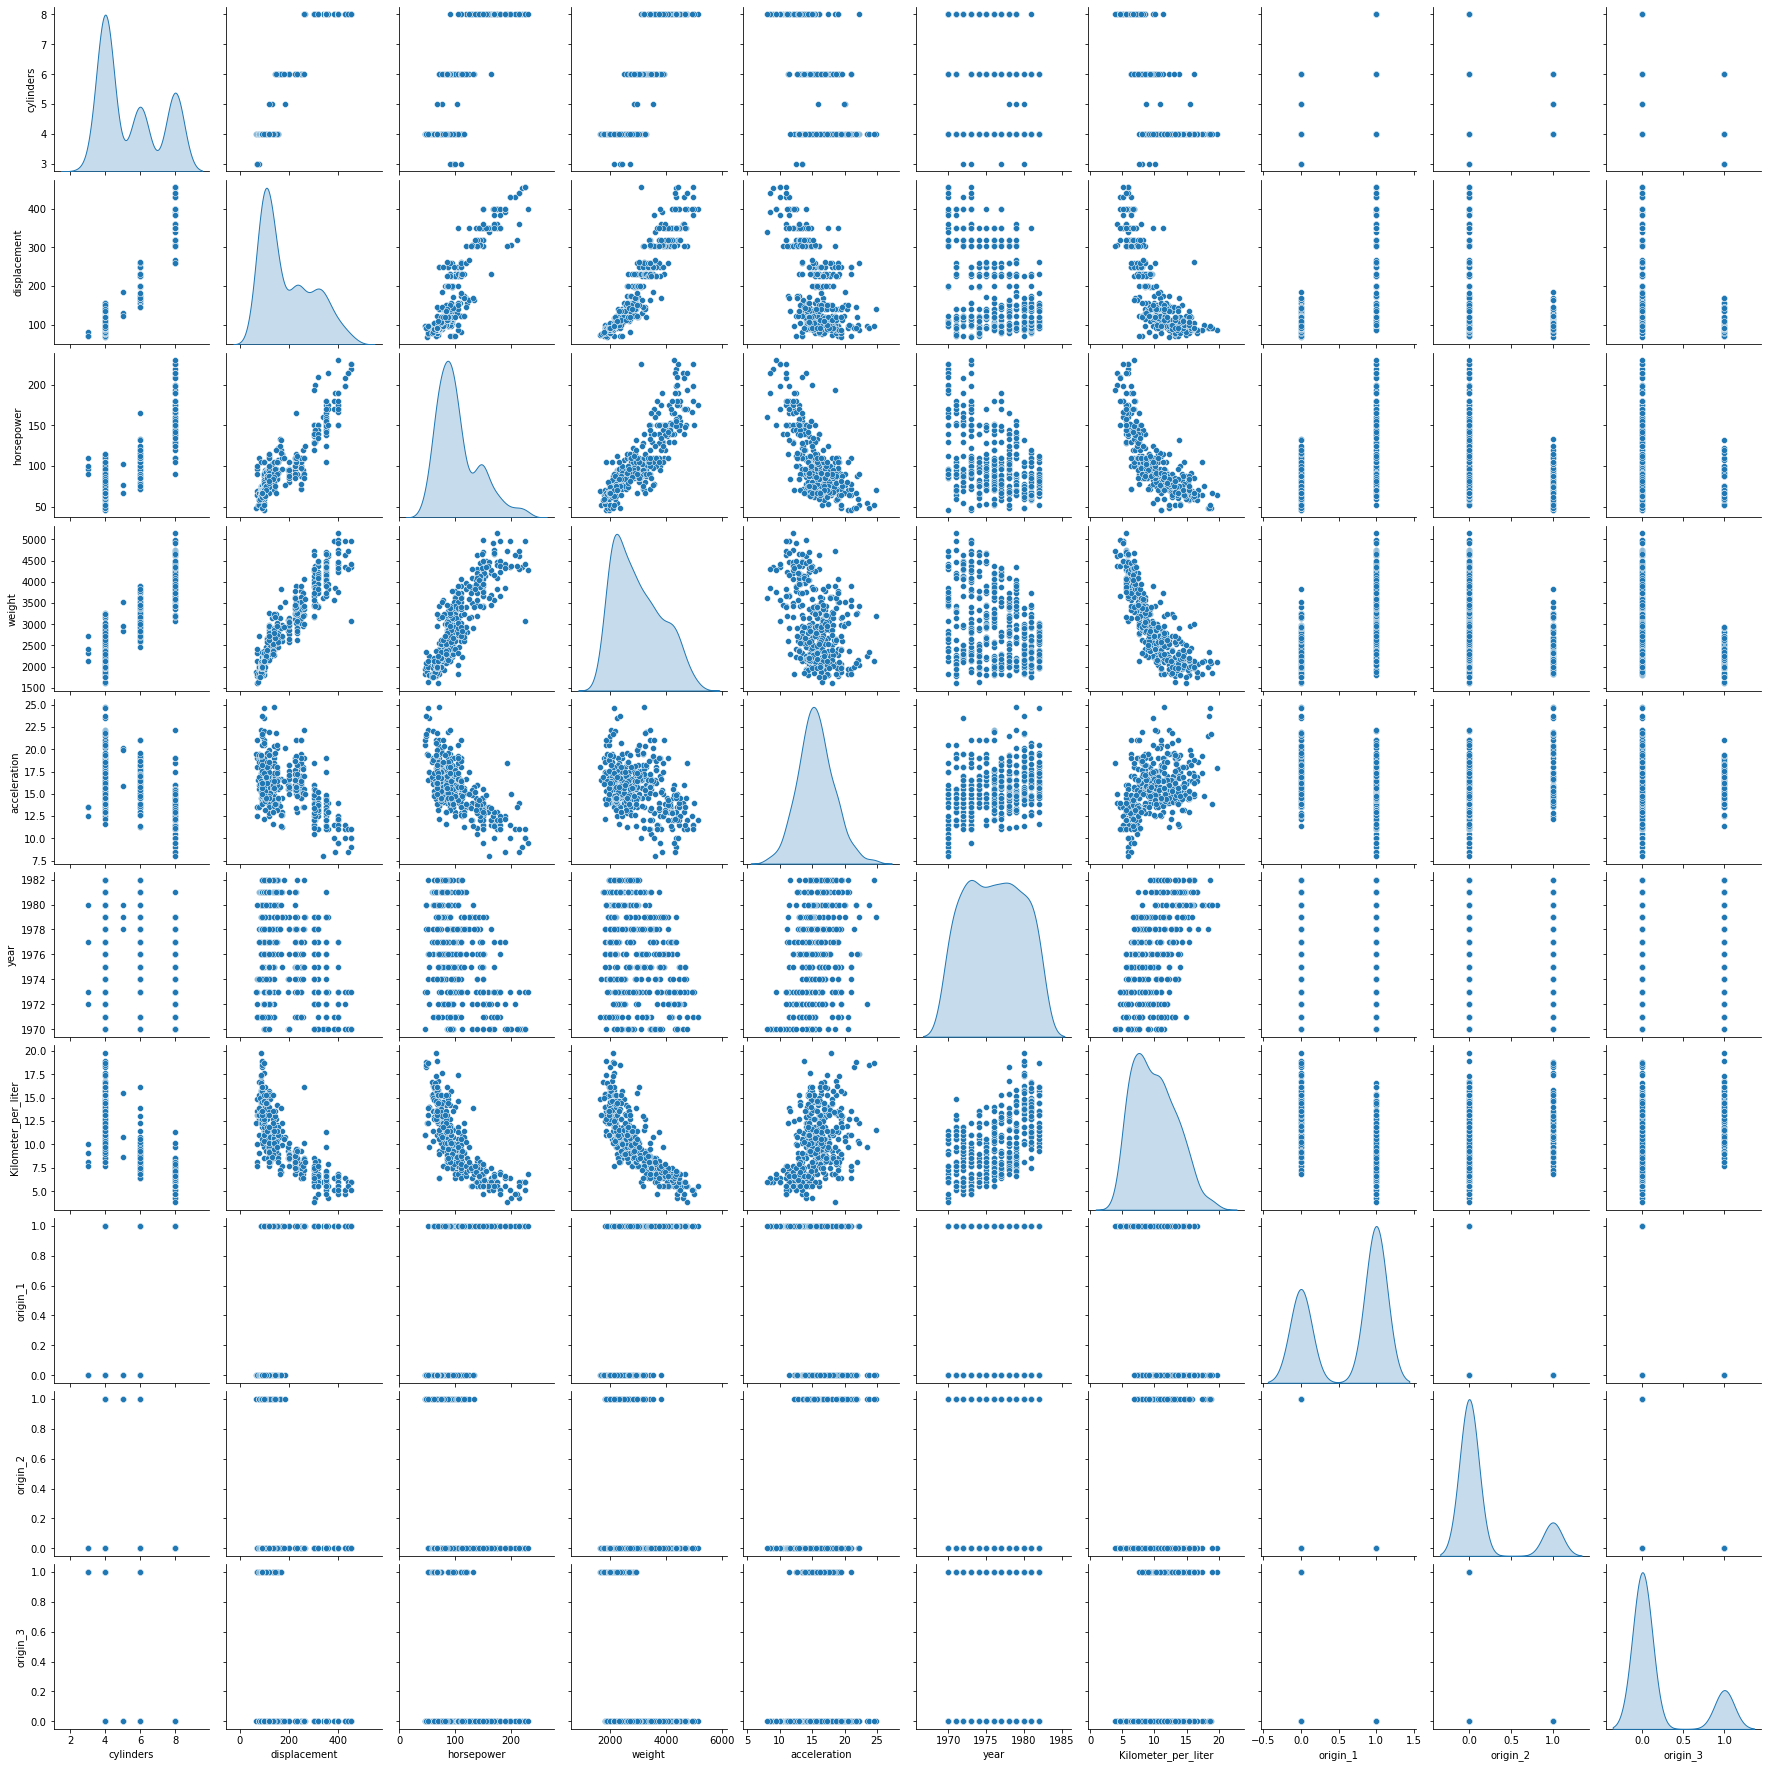

In [29]:
sns.pairplot(n_df, diag_kind='kde')

In [30]:
X=n_df[['cylinders','displacement','weight','acceleration','horsepower','origin_1']]
Y=n_df[['Kilometer_per_liter']]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [32]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [33]:
model.score(X_train, Y_train)

0.6920071396661693

In [34]:
model.score(X_test, Y_test)

0.7654596938246848

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

Y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, Y_train))

0.8152716892049949


In [36]:
print(poly_clf.score(X_test2, Y_test))

0.740904947333703


In [ ]:
##

In [37]:
n_df.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'name', 'Kilometer_per_liter', 'origin_1', 'origin_2',
       'origin_3'],
      dtype='object')

In [38]:
X=n_df[['cylinders','displacement','weight','acceleration','horsepower']]
Y=n_df[['Kilometer_per_liter']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [39]:
model.score(X_train, Y_train)

0.6871071135180788

In [40]:
model.score(X_test, Y_test)

0.7478189574129672

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

Y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, Y_train))

0.7720294045865148


In [ ]:
print(poly_clf.score(X_test2, Y_test))

In [ ]:
X=n_df[['cylinders','displacement','weight','acceleration','horsepower','year']]
Y=n_df[['Kilometer_per_liter']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
model.score(X_train, Y_train)

In [ ]:
model.score(X_test, Y_test)

In [ ]:
### SGD

In [45]:
n_df.drop(['name'],axis=1,inplace=True)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=n_df.drop(['Kilometer_per_liter'],axis=1)
X=scaler.fit_transform(x)
Y=n_df
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [49]:
from sklearn.linear_model import SGDRegressor

In [50]:
sgd=SGDRegressor(loss='squared_loss',alpha=0.1,max_iter=50)

In [53]:
sgd.fit(x_train,y_train.Kilometer_per_liter)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(alpha=0.1, max_iter=50)

In [54]:
y_pred=sgd.predict(x_test)

In [55]:
y_score=sgd.score(x_train,y_train.Kilometer_per_liter)

In [57]:
print('R-Squared value:',y_score)

R-Squared value: 0.7029033401832725


In [59]:
from statsmodels.tools.eval_measures import rmse

In [61]:
rmse_sgd=rmse(y_pred,y_test.Kilometer_per_liter)

In [62]:
print("Rmse value:",rmse_sgd)

Rmse value: 1.4619846112706747
